In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Exercice 2 : maximum de vraisemblance

### <span style="color:blue">QUESTION 2.1 :</span> 

Tirer 10 fois une pièce à pile ou face et modéliser les résultats obtenus comme ceux d'une variable aléatoire X qui vaut X_i=0 si on a pile et X_i=1 si on a face.

Calculez le maximum de vraisemblance du paramètre p d'un loi de Bernoulli qui modéliserait le problème. Pour y arriver, différentes valeures possibles de p seront testées et le p retenu sera celui qui a la plus grande vraisemblance.


- Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages
- Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.




N=100, piles=47, faces=53
p̂ (grille) = 0.5346
p̂ (forme fermée) = 0.5300


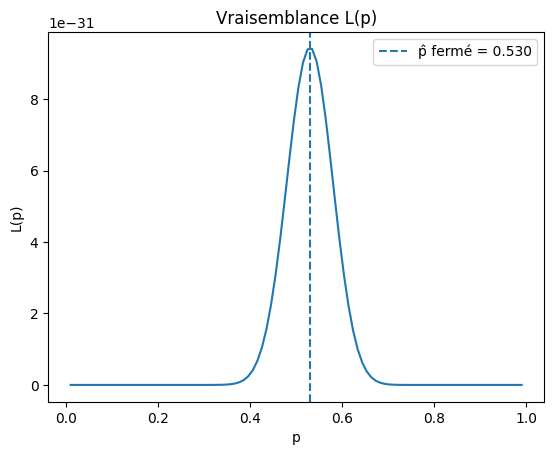

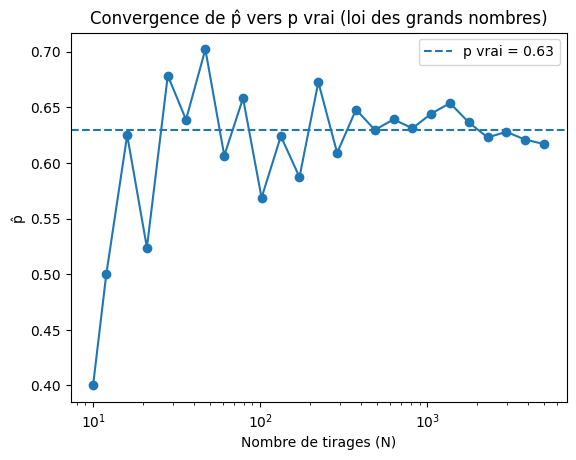

N grand = 20000, p̂ (log-likelihood) = 0.6237 (attendu ≈ 0.63)


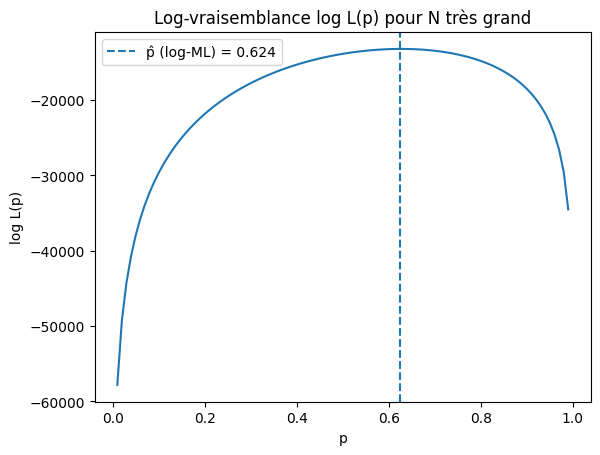

In [ ]:
NbTirages=100
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces=NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)

def vraisemblance(n_pile, n_face, p):
    """
    X=1 (face) avec probabilité p, X=0 (pile) avec probabilité 1-p.
    L(p) = p^(n_face) * (1-p)^(n_pile)
    """
    return (p**n_face) * ((1 - p)**n_pile)

# Vraisemblance sur la grille (peut sous-déborder pour N grand)
L = np.array([vraisemblance(NbPiles, NbFaces, p) for p in PossibleValuesForP])
p_mle_grille = PossibleValuesForP[np.argmax(L)]

# MLE en forme fermée (Bernoulli) : p̂ = (#faces)/N
p_hat_closed = NbFaces / NbTirages

print(f"N={NbTirages}, piles={NbPiles}, faces={NbFaces}")
print(f"p̂ (grille) = {p_mle_grille:.4f}")
print(f"p̂ (forme fermée) = {p_hat_closed:.4f}")

# ---------------------------
# Visualisation de L(p)
# ---------------------------
plt.figure()
plt.plot(PossibleValuesForP, L)
plt.axvline(p_hat_closed, linestyle='--', label=f"p̂ fermé = {p_hat_closed:.3f}")
plt.title("Vraisemblance L(p)")
plt.xlabel("p")
plt.ylabel("L(p)")
plt.legend()
plt.show()

# -----------------------------------------------
# Empiriquement : convergence de p̂ quand N ↑
# -----------------------------------------------
true_p = 0.63  # on fixe une 'pièce' biaisée pour voir la convergence
Ns = np.unique(np.geomspace(10, 5000, 25).astype(int))
p_hats = []

rng = np.random.default_rng(42)
for N in Ns:
    # Tirages Bernoulli( true_p )
    x = rng.random(N) < true_p   # True ~ 1 (face)
    n_face = x.sum()
    p_hats.append(n_face / N)

plt.figure()
plt.plot(Ns, p_hats, marker='o')
plt.axhline(true_p, linestyle='--', label=f"p vrai = {true_p}")
plt.xscale('log')
plt.xlabel("Nombre de tirages (N)")
plt.ylabel("p̂")
plt.title("Convergence de p̂ vers p vrai (loi des grands nombres)")
plt.legend()
plt.show()

# -------------------------------------------------------
# Quand il y a 'trop' de tirages : utiliser log-L(p)
# -------------------------------------------------------
N_big = 20000
x_big = rng.random(N_big) < true_p
n_face_big = x_big.sum()
n_pile_big = N_big - n_face_big

# log-vraisemblance : ll(p) = n_face*log(p) + n_pile*log(1-p)
def log_vraisemblance(n_pile, n_face, p):
    # ajouter un epsilon pour éviter log(0) aux bords (mais on a déjà évité 0 et 1 dans la grille)
    return n_face*np.log(p) + n_pile*np.log(1 - p)

ll = np.array([log_vraisemblance(n_pile_big, n_face_big, p) for p in PossibleValuesForP])
p_mle_log = PossibleValuesForP[np.argmax(ll)]

print(f"N grand = {N_big}, p̂ (log-likelihood) = {p_mle_log:.4f} (attendu ≈ {true_p})")

plt.figure()
plt.plot(PossibleValuesForP, ll)
plt.axvline(p_mle_log, linestyle='--', label=f"p̂ (log-ML) = {p_mle_log:.3f}")
plt.title("Log-vraisemblance log L(p) pour N très grand")
plt.xlabel("p")
plt.ylabel("log L(p)")
plt.legend()
plt.show()



### <span style="color:blue">QUESTION 2.2 :</span> 


Vérifier empiriquement comment évolue ce maximum de vraisemblance si l'on effectue de plus en plus de tirages. Pour éviter de tirer des centaines de fois à pile ou face, vous pourrez juste modifier *NbTirages¨et *NbPiles* dans le code, puis voir le comportement de la courbe *plt.plot(PossibleValuesForP,CorrespondingLikelihood)*.


### <span style="color:blue">REPONSE 2.2 :</span> 




...

### <span style="color:blue">QUESTION 2.3 :</span> 


Que se passe-t-il quand il y a trop de tirages ? Représenter la log-vraisemblance plutot que la vraisemblance dans ce cas.

### <span style="color:blue">REPONSE 2.3 :</span> 


In [ ]:
NbTirages=2000
NbPiles = np.random.randn(NbTirages) > 0
NbPiles = np.sum(NbPiles)
NbFaces = NbTirages-NbPiles


PossibleValuesForP=np.linspace(0.01,0.99,100)

def log_vraisemblance(n_pile,n_face,p):
    return n_pile*np.log(p) + n_face*np.log(1-p)

CorrespondingLikelihood = [log_vraisemblance(NbPiles,)]
...